# Energy vs. Pressure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.integrate import quad

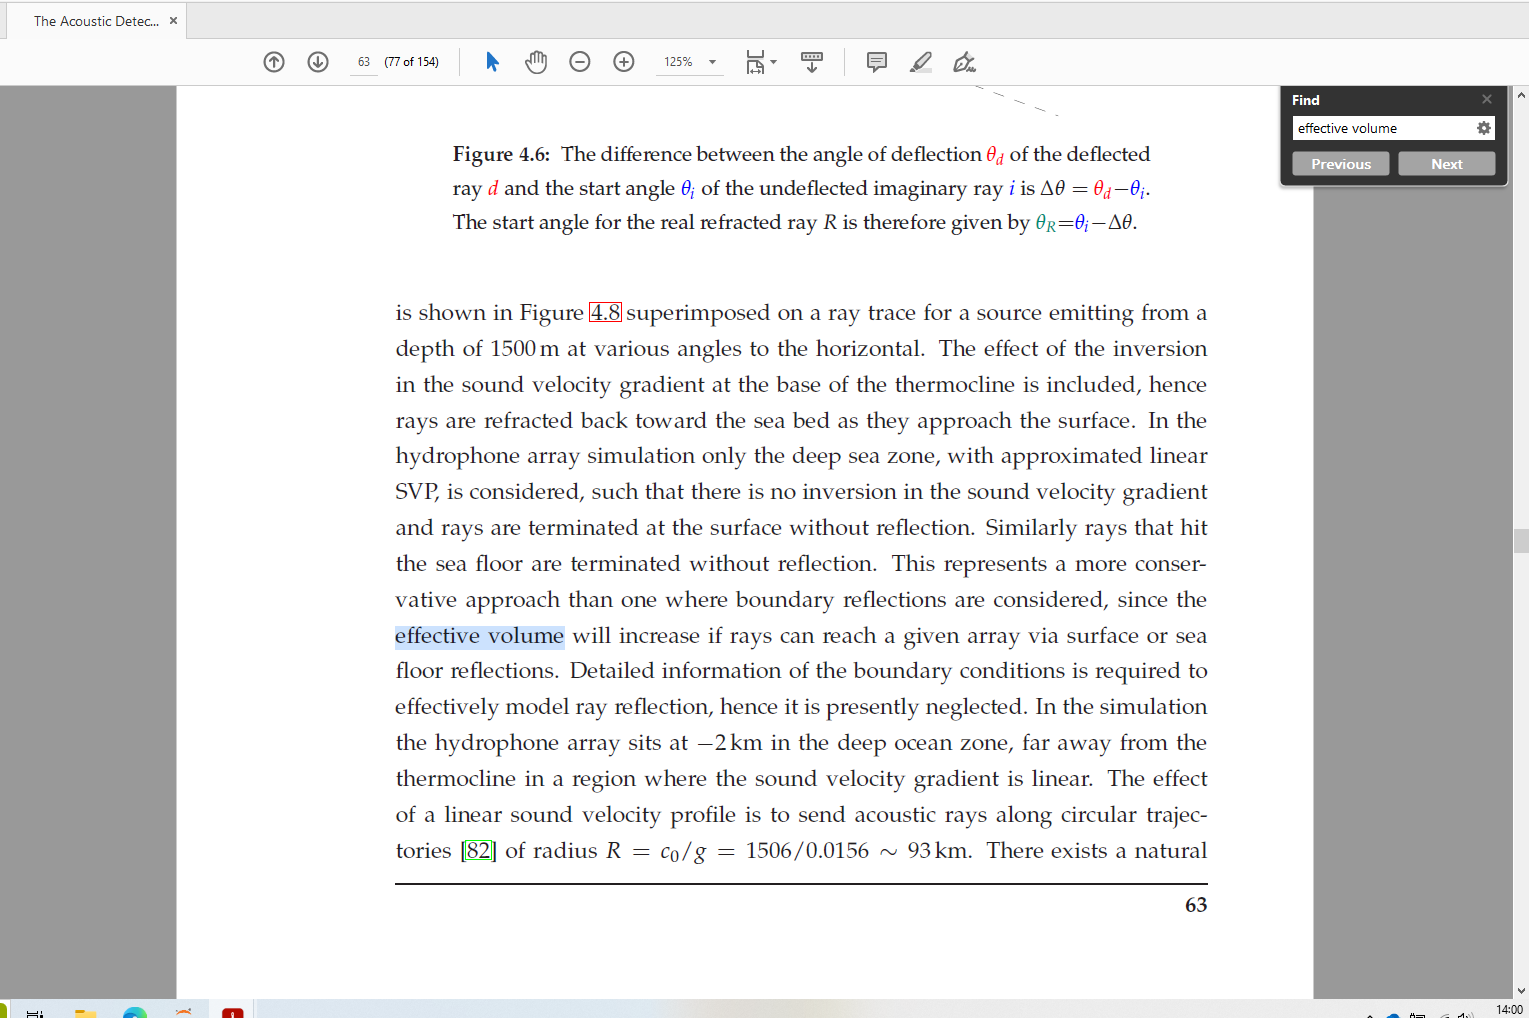

* https://riunet.upv.es/bitstream/handle/10251/85981/Salda%C3%B1a%20-%20Acoustic%20System%20Development%20for%20Neutrino%20Underwater%20Detectors.pdf?sequence=1 (relation 1/r)
* https://indico.cern.ch/event/667036/timetable/?view=standard_numbered_inline_minutes (formula amplitude vs energy)
* Karg praat ook over de 1/r en 1/root(r)

In [2]:
log_energy = np.linspace(9, 17, 100)
neutrino_energy = [10**i for i in log_energy]
log_energy = np.linspace(9, 16, 100)
cascade_energy = [10**i * 10**(9) for i in log_energy]

# Where is the below relation from???
def relation(neutrino_energy):
    pressure = 2.12 * 10**(-11) * neutrino_energy
    pressure_mPa = pressure * 1000
    return pressure_mPa

# Volume

The following data is imported from the "Effective Volume (RBox=15km-17.5km).ipynb" notebook.

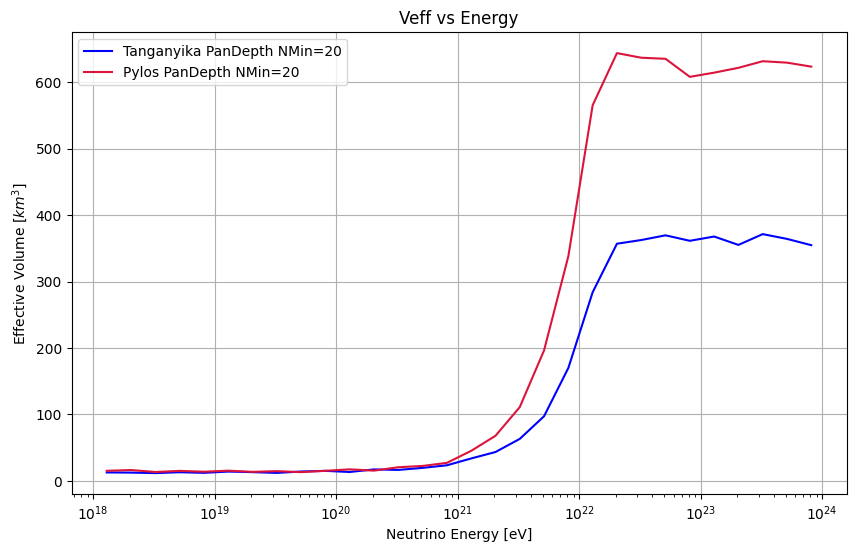

In [3]:
energy_Veff = [1.00000000e+18, 1.58489319e+18, 2.51188643e+18, 3.98107171e+18, 6.30957344e+18, 1.00000000e+19, 1.58489319e+19, 
               2.51188643e+19, 3.98107171e+19, 6.30957344e+19, 1.00000000e+20, 1.58489319e+20, 2.51188643e+20, 3.98107171e+20, 
               6.30957344e+20, 1.00000000e+21, 1.58489319e+21, 2.51188643e+21, 3.98107171e+21, 6.30957344e+21, 1.00000000e+22, 
               1.58489319e+22, 2.51188643e+22, 3.98107171e+22, 6.30957344e+22, 1.00000000e+23, 1.58489319e+23, 2.51188643e+23, 
               3.98107171e+23, 6.30957344e+23, 1.00000000e+24]

# Initialize an empty list to store the midpoints
midpoints = []

# Iterate through each pair of consecutive elements
for i in range(len(energy_Veff) - 1):
    # Calculate the midpoint between the current element and the next element
    midpoint = (energy_Veff[i] + energy_Veff[i + 1]) / 2
    # Append the midpoint to the list
    midpoints.append(midpoint)

Veff_20_T = [12.74656171, 12.49924753, 11.72056632, 13.08065878, 12.13340274,
                 14.04698128, 13.18937672, 12.02278048, 14.14214671, 15.13169846,
                 13.41969459, 17.31513715, 16.54326838, 19.61314848, 23.51219218,
                 33.81221719, 43.47204574, 63.24195841, 97.35321912, 170.07087043,
                 283.98023786, 356.99432467, 362.56828573, 369.63932065, 361.40141984,
                 367.8279298, 355.21619135, 371.45633971, 364.26550712, 354.81081569]


Veff_20_P = [15.23241955, 16.36167922, 13.44318653, 15.08982036, 13.84199459,
                 15.39589443, 13.64949446, 14.70977046, 13.19077367, 15.21428571,
                 17.39960618, 15.4875717, 20.58981233, 22.5287077, 27.15192147,
                 45.28849643, 67.88373769, 111.09792285, 196.46176912, 338.27956989,
                 565.41755238, 643.8918134, 636.97640828, 635.33225284, 608.18377602,
                 614.48201697, 621.77722153, 631.69648217, 629.55611033, 623.56105433]


midpoints_GeV = [i / 1e9 for i in midpoints]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(midpoints, Veff_20_T, color="blue", linestyle="solid", label="Tanganyika PanDepth NMin=20")
plt.plot(midpoints, Veff_20_P, color="crimson", linestyle="solid", label="Pylos PanDepth NMin=20")

plt.xscale("log")
plt.title('Veff vs Energy')
plt.xlabel('Neutrino Energy [eV]')
plt.ylabel('Effective Volume [$km^3$]')
#plt.axvline(energy)


plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [4]:
# The above is the effective volume of one detector block, we have ten
Veff_10_20_T = [(i * 1) for i in Veff_20_T]
Veff_10_20_P = [(i * 1) for i in Veff_20_P]
Veff_10_10_T = [(i * 10) for i in Veff_20_T]
Veff_10_10_P = [(i * 10) for i in Veff_20_P]
Veff_10_4_T = [(i * 100) for i in Veff_20_T]
Veff_10_4_P = [(i * 100) for i in Veff_20_P]

# Cross Section

In [5]:
# Put the energy in GeV
cascade_energy_GeV = [i * 10**(-9) for i in cascade_energy]

for i in range(0, len(cascade_energy_GeV)):
    a = "{:.3e}".format(cascade_energy_GeV[i])
    #print(a)

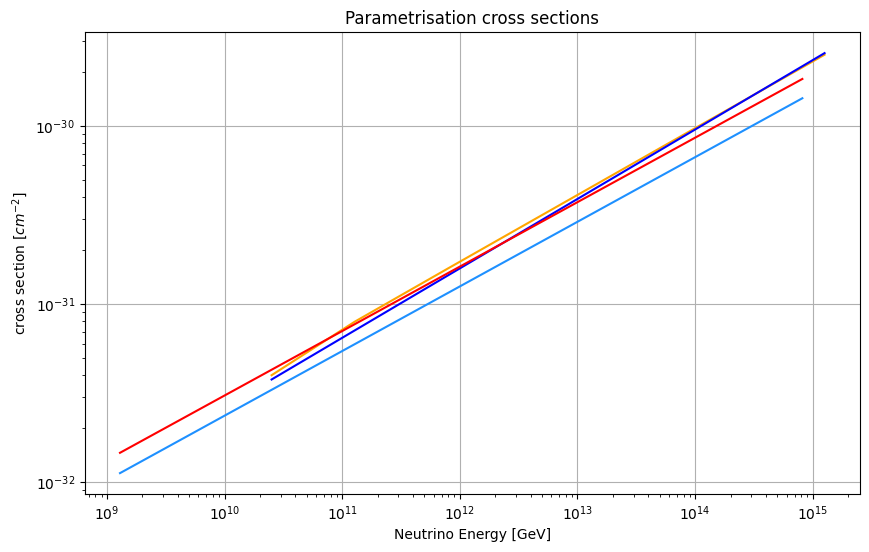

In [6]:
# Read the following numbers from the graph in Appendix A in Perkin
cross = [10**(-31.4), 10**(-31.1), 10**(-30.8), 10**(-30.5), 10**(-30.2), 10**(-29.9), 10**(-29.6)]          # cm^2
E_test2 = [10**(10.4), 10**(11.105), 10**(11.9), 10**(12.7), 10**(13.5), 10**(14.3), 10**(15.1)]             # GeV

# Try to Parametrize the curve (linear)
para = []
for i in range(0, len(E_test2)):
    energy = E_test2[i]
    cross_section = energy**(0.39) / 10**(35.48)
    para.append(cross_section)

perkin_cross_section = []

# The parametrisation from Perkin
for i in range(0, len(midpoints)):
    energy = [i / 1e9 for i in midpoints][i]
    cross_section = 10**(-32.60 + (0.362*(np.log10(energy)-7.0)))
    perkin_cross_section.append(cross_section)
    
midpoints_GeV = [i / 1e9 for i in midpoints]

# parametrisation from following source: https://arxiv.org/pdf/1908.07695.pdf
cross_source = []
for i in range(0, len(midpoints)):
    energy = [i / 1e9 for i in midpoints][i]
    cross_section = 5.53 * 10**(-36) * energy**(0.363) 
    cross_source.append(cross_section)


# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_test2, cross, color='orange')
plt.loglog(E_test2, para, color='blue')
plt.loglog(midpoints_GeV, perkin_cross_section, color='red')
plt.loglog(midpoints_GeV, cross_source, color='dodgerblue')

plt.title('Parametrisation cross sections')
plt.xlabel('Neutrino Energy [GeV]')
plt.ylabel('cross section [$cm^{-2}$]')

plt.grid(True)
plt.show()

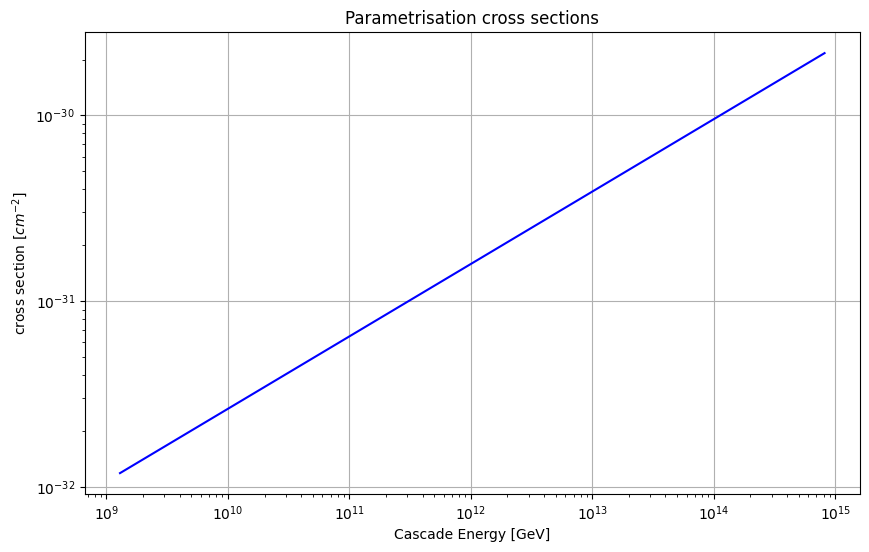

In [7]:
# With the new parametrisation, calculate the cross sections matching the energies wanted
cross = []

# loop through the wanted energies
for i in range(0, len(midpoints_GeV)):
    energy = midpoints_GeV[i]
    cross_section = energy**(0.39) / 10**(35.48)
    cross.append(cross_section)
    
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(midpoints_GeV, cross, color='blue')

plt.title('Parametrisation cross sections')
plt.xlabel('Cascade Energy [GeV]')
plt.ylabel('cross section [$cm^{-2}$]')

plt.grid(True)
plt.show()

In [11]:
# parameters
Sup = 3
N_a = 6.022 * 10**(23)
rho = 1                                                                                   # g cm^-3
T = 365*24*3600*15                                                                           # s
molar_mass = 18.01528                                                                     # g mol^-1
T5 = 5 * T                                                                                # g mol^-1
mol_constant = 1 / molar_mass                                                             # mol g^-1

# Assume that all the events in this volume will be measured as the effective volume takes into account the fraction
fraction = 1


# TANGANYIKA ################################################################################################################
# Change the box volume to cm^3
Vbox_i20 = [i * 10**(15) for i in Veff_10_20_T]                                                 # cm^3
Vbox_i10 = [i * 10**(15) for i in Veff_10_10_T]                                                 # cm^3
Vbox_i4 = [i * 10**(15) for i in Veff_10_4_T]                                                   # cm^3

# Calculate the sensitivity for the energies above for 1 year and 5 year
sensitivities_20_T = []
sensitivities_10_T = []
sensitivities_4_T = []

# Calculate the lambda for each box volume and calculate the sensitivities
for i in range(0, len(midpoints_GeV)):
    lam20 = perkin_cross_section[i] * rho * N_a * Vbox_i20[i] * 2 * np.pi * T * fraction * mol_constant      # cm^2 s
    lam10 = perkin_cross_section[i] * rho * N_a * Vbox_i10[i] * 2 * np.pi * T * fraction * mol_constant      # cm^2 s
    lam4 = perkin_cross_section[i] * rho * N_a * Vbox_i4[i] * 2 * np.pi * T * fraction * mol_constant        # cm^2 s

    energy = midpoints_GeV[i]
    
    phi20 = Sup / (energy * lam20)                                                                           # GeV^-1 cm^-2 s^-1
    phi10 = Sup / (energy * lam10)                                                                           # GeV^-1 cm^-2 s^-1
    phi4 = Sup / (energy * lam4)                                                                             # GeV^-1 cm^-2 s^-1

    phi_E22_20 = energy**2 * phi20                                                                           # GeV^1 cm^-2 s^-1
    phi_E22_10 = energy**2 * phi10                                                                           # GeV^1 cm^-2 s^-1
    phi_E22_4 = energy**2 * phi4                                                                             # GeV^1 cm^-2 s^-1

    sensitivities_20_T.append(phi_E22_20)
    sensitivities_10_T.append(phi_E22_10)
    sensitivities_4_T.append(phi_E22_4)


    
# PYLOS #####################################################################################################################
# Change the box volume to cm^3
Vbox_i20 = [i * 10**(15) for i in Veff_10_20_P]                                                 # cm^3
Vbox_i10 = [i * 10**(15) for i in Veff_10_10_P]                                                 # cm^3
Vbox_i4 = [i * 10**(15) for i in Veff_10_4_P]                                                   # cm^3

# Calculate the sensitivity for the energies above for 1 year and 5 year
sensitivities_20_P = []
sensitivities_10_P = []
sensitivities_4_P = []

# Calculate the lambda for each box volume and calculate the sensitivities
for i in range(0, len(midpoints_GeV)):
    lam20 = perkin_cross_section[i] * rho * N_a * Vbox_i20[i] * 2 * np.pi * T * fraction * mol_constant      # cm^2 s
    lam10 = perkin_cross_section[i] * rho * N_a * Vbox_i10[i] * 2 * np.pi * T * fraction * mol_constant      # cm^2 s
    lam4 = perkin_cross_section[i] * rho * N_a * Vbox_i4[i] * 2 * np.pi * T * fraction * mol_constant        # cm^2 s

    energy = midpoints_GeV[i]
    
    phi20 = Sup / (energy * lam20)                                                                           # GeV^-1 cm^-2 s^-1
    phi10 = Sup / (energy * lam10)                                                                           # GeV^-1 cm^-2 s^-1
    phi4 = Sup / (energy * lam4)                                                                             # GeV^-1 cm^-2 s^-1

    phi_E22_20 = energy**2 * phi20                                                                           # GeV^1 cm^-2 s^-1
    phi_E22_10 = energy**2 * phi10                                                                           # GeV^1 cm^-2 s^-1
    phi_E22_4 = energy**2 * phi4                                                                             # GeV^1 cm^-2 s^-1

    sensitivities_20_P.append(phi_E22_20)
    sensitivities_10_P.append(phi_E22_10)
    sensitivities_4_P.append(phi_E22_4)

In [12]:
# Read of values for the graph 5.18 Perkin and 7.13 Karg
E_Perkin = [10**(11.35), 10**(11.75), 10**(11.9), 10**(12.2), 10**(12.4), 10**(12.6), 10**(12.9), 10**(13.2), 10**(13.45), 10**(13.95), 10**(15), 10**(15.85)]
Phi_Perkin = [10**(-5.45), 10**(-5.85), 10**(-6), 10**(-6.2), 10**(-6.3), 10**(-6.4), 10**(-6.35), 10**(-6.2), 10**(-6.1), 10**(-5.8), 10**(-5.1), 10**(-4.5)]

Phi_Perkin5 = [10**(-8.5), 10**(-8.7), 10**(-8.6), 10**(-8.5), 10**(-8.3), 10**(-8), 10**(-7.7), 10**(-7.4), 10**(-7.2), 10**(-6.8), 10**(-6.5), 10**(-6.2)]
E_Perkin5 = [10**(10.5), 10**(11), 10**(11.5), 10**(12), 10**(12.5), 10**(13), 10**(13.5), 10**(14), 10**(14.5), 10**(15), 10**(15.5), 10**(16)]

Phi_Karg = [10**(-7), 10**(-7.85), 10**(-7.3), 10**(-6.9), 10**(-6.7), 10**(-6.4), 10**(-5.9), 10**(-5.4)]
E_Karg = [10**(9.4), 10**(10.4), 10**(11.3), 10**(12.4), 10**(13.2), 10**(14), 10**(15), 10**(16)]

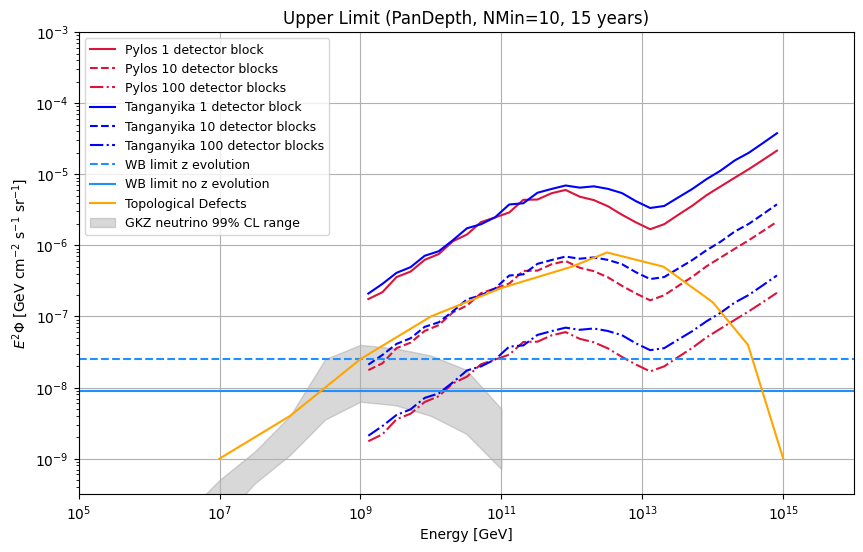

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
#plt.loglog(E_Perkin, Phi_Perkin, color="red", linestyle='dotted', label="Sensitivity Perkin 1 year with 1000 hydrophones")
#plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Sensitivity Perkin 5 years with 150.000 hydrophones")
#plt.loglog(E_Karg, Phi_Karg, color="lime", linestyle='dotted', label="Sensitivity Karg 5 years with 300.000")

#plt.loglog(midpoints_GeV, sensitivities_T, color="blue", label="1 year Tanganyika")
#plt.loglog(midpoints_GeV, sensitivities5_T, color="blue", linestyle="dashed", label="5 years Tanganyika")
plt.loglog(midpoints_GeV, sensitivities_20_P, color="crimson", linestyle="solid", label="Pylos 1 detector block")
plt.loglog(midpoints_GeV, sensitivities_10_P, color="crimson", linestyle="dashed", label="Pylos 10 detector blocks")
plt.loglog(midpoints_GeV, sensitivities_4_P, color="crimson", linestyle="dashdot", label="Pylos 100 detector blocks")

plt.loglog(midpoints_GeV, sensitivities_20_T, color="blue", linestyle="solid", label="Tanganyika 1 detector block")
plt.loglog(midpoints_GeV, sensitivities_10_T, color="blue", linestyle="dashed", label="Tanganyika 10 detector blocks")
plt.loglog(midpoints_GeV, sensitivities_4_T, color="blue", linestyle="dashdot", label="Tanganyika 100 detector blocks")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
#plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.6), label="WB limit z evolution", color="dodgerblue", linestyle='dashed')
plt.axhline(10**(-8.05), label="WB limit no z evolution", color="dodgerblue")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', color='orange')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
#plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')


GKZ_E = [10**(6.5), 10**(7), 10**(7.5), 10**(8), 10**(8.5), 10**(9), 10**(9.5), 10**(10), 10**(10.5), 10**(11)]
GKZ_flux_E_upper = [10**(-9.8), 10**(-9.3), 10**(-8.9), 10**(-8.4), 10**(-7.6), 10**(-7.4), 10**(-7.45), 10**(-7.55), 10**(-7.75), 10**(-8.3)]
GKZ_flux_E_lower = [10**(-10.2), 10**(-9.9), 10**(-9.35), 10**(-8.95), 10**(-8.45), 10**(-8.2), 10**(-8.25), 10**(-8.4), 10**(-8.65), 10**(-9.15)]



plt.fill_between(GKZ_E, GKZ_flux_E_upper, GKZ_flux_E_lower, color='grey', alpha=0.3, label=f"GKZ neutrino 99% CL range")

################################################################################################################################


plt.title('Upper Limit (PanDepth, NMin=10, 15 years)')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
plt.ylim(10**(-9.5), 10**(-3))
plt.legend(fontsize=9)
plt.grid(True)
plt.savefig("pandepth_10_15.jpg")
plt.show()

In [188]:
threshold = 5
radius_pancake = 175000                                      

Pressure_1000m = (radius_pancake - 1000) * threshold
energy = Pressure_1000m / (0.25 * 21.15 * 10**(-18))
print(energy)

1.645390070921986e+23


In [186]:
# Define a detection threshold in mPa
threshold = 5                                                                               # in mPa
energy = 1.645390070921986e+23

# Pressure at 1000 m Perkin
Pressure_1000m = 0.25 * 21.15 * 10**(-18) * energy                                          # in mPa
radius_pancake = 1000 + (Pressure_1000m / threshold)

print(radius_pancake)

175000.0
